<a href="https://colab.research.google.com/github/Runushkina/educational_projects/blob/main/Introduction%20to%20Machine%20Learning%20(Python)%20and%20Advanced%20Machine%20Learning%20(Python)/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# mounting my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/94_16.csv', header=None) #reading the data
data.head(10)

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889
5,9.601509,-17.334996,-24.127299,-19.342414,0.492613,-13.377177,-11.756583,-23.998003,-12.997439,18.554854
6,9.775003,-8.705064,-21.636552,7.356519,2.160537,-23.072937,-17.002317,5.345636,15.625533,-5.754360
7,11.259948,-14.889241,-21.940512,-16.009979,0.024598,-15.101501,-10.039564,-23.297495,-9.398128,22.819532
8,9.990271,-10.760423,-23.022906,5.507930,-0.164068,-23.644331,-16.596488,4.921537,13.893486,-4.326099
9,10.085331,-14.157765,-24.167099,-17.898493,-0.233567,-15.999375,-13.649157,-24.139879,-11.306592,19.955061


## New coordinats

In [ ]:
pca = PCA(n_components=2, svd_solver='full') #pca object creation with 2 PCs
data_transformed = pca.fit(data).transform(data) # new coordinats of the objects in 2 PCs

## Coordinates of the first object with respect to the both principal components

In [ ]:
[round(i, 3) for i in data_transformed[0]]

[-19.058, 31.913]

## Fraction of variance explained when the first and the second principal components

In [ ]:
explained_var_1st=pca.explained_variance_ratio_[0] #fraction of variance when only 1st is used
explained_var_2nd=pca.explained_variance_ratio_[1] #when only second is used
print ("Fraction of variance:", round(explained_var_1st+explained_var_2nd,3)) #when both

Fraction of variance: 0.781


## Minimal number of principal components are to be used, so that the fraction of variance explained will exceed 0.85

In [ ]:
pca_1 = PCA(n_components=10, svd_solver='full') #creating a pca object with 10 components to see how the explained fraction is changing
data_transformed_10 = pca_1.fit(data).transform(data) #
explained_variance = np.round(np.cumsum(pca_1.explained_variance_ratio_), 3) #calculating the explained fraction for each number of components used
explained_variance

array([0.492, 0.781, 0.991, 0.993, 0.995, 0.996, 0.998, 0.999, 0.999,
       1.   ])

## Number of groups the objects can be splitted in, if only the first and the second principal components are used?

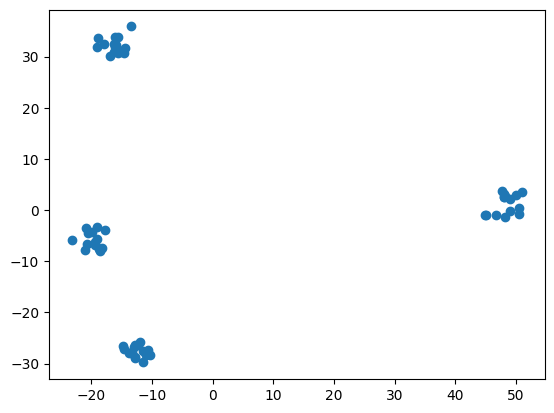

In [ ]:
plt.scatter([n[0] for n in data_transformed], [n[1] for n in data_transformed])

# Task 2 - logo

In [ ]:
loading=pd.read_csv('/content/drive/My Drive/Data/X_loadings_561.csv', header=None, delimiter=';') #loading matrix
reduced=pd.read_csv('/content/drive/My Drive/Data/X_reduced_561.csv', header=None, delimiter=';') #score matrix

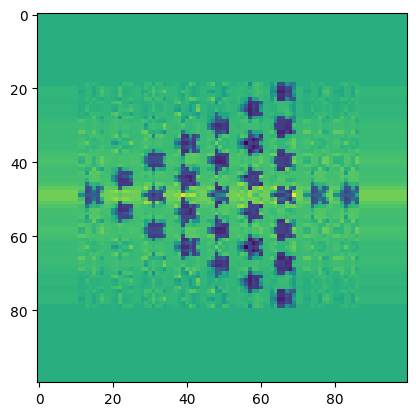

In [ ]:
Z = np.dot(loading, reduced.transpose())
plt.imshow(Z) #recovering the image